## 抓取的表格数据如下，分为海外和中国两部分：

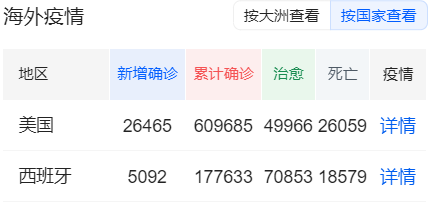

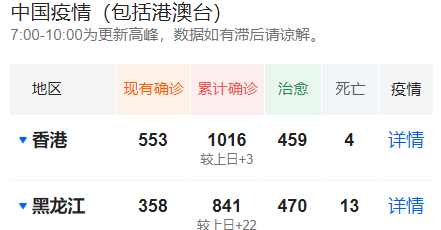

---

python3.7 

采用selenuim 抓取动态页面 +  pandas来处理表格数据

**思路**：

采用selenium去驱动浏览器并根据url抓取整个html

再用BeautifulSoup去解析这个html（定位到数据所在的table并从html中读取这个table）

用pandas读取并清洗table。

将table保存到本地文件。

---

### 步骤1：采用selenium去驱动浏览器并根据url抓取整个html

In [270]:
from selenium import webdriver

In [271]:
# 数据源
foreign_url='https://news.qq.com/zt2020/page/feiyan.htm#/global?nojump=1'
china_url='https://news.qq.com/zt2020/page/feiyan.htm#/?nojump=1'

In [272]:
webdriver_path='C:\Program Files (x86)\Microsoft\Edge\Application\msedgedriver.exe'    # msedgedriver.exe 是在Edge官网下的。
# 打开浏览器窗口
foreign_driver=webdriver.Edge(executable_path=webdriver_path) 
china_driver=webdriver.Edge(executable_path=webdriver_path) 
# 打开网址
foreign_driver.get(foreign_url)
china_driver.get(china_url)

In [273]:
# 如果不在jupyter中，这里要稍作暂停再执行，确保网页已加载完成。
foreign_html_doc=foreign_driver.page_source
china_html_doc=china_driver.page_source
# 关闭浏览器窗口
foreign_driver.close()
china_driver.close()

### 步骤2： 再用BeautifulSoup去解析这个html（定位到数据所在的table并从html中读取这个table）

In [274]:
from bs4 import BeautifulSoup

In [275]:
foreign_soup = BeautifulSoup(foreign_html_doc,'lxml')  # 使用第三方lxml HTML 解析器，安装方法 pip install lxml
china_soup = BeautifulSoup(china_html_doc,'lxml')  # 使用第三方lxml HTML 解析器，安装方法 pip install lxml

In [276]:
foreign_data = foreign_soup.find('div',class_="foreignListWraper").find('div',class_="listWraper filterGray").find_all('table')[0]
china_data = china_soup.find('div',class_="chinaListWraper filterGray").find('div',class_='listWraper').find_all('table')[1]

In [277]:
# 已经拿到了数据
print(type(foreign_data))
print(type(china_data))

<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


In [278]:
foreign_data = foreign_data.prettify() # 基于bs4库HTML的格式输出
china_data = china_data.prettify()

### 步骤3： 用pandas读取并清洗table。

In [279]:
import pandas as pd

In [299]:
foreign_df = pd.read_html(foreign_data)[0]
china_df = pd.read_html(china_data)[0]

In [300]:
# 国外的数据汇总
foreign_df.head(3)

,地区,新增确诊,累计确诊,治愈,死亡,疫情
0,美国,26465,609685,49966,26059,详情
1,西班牙,5092,177633,70853,18579,详情
2,意大利,2972,162488,37130,21067,详情


In [301]:
# 中国的数据表中含了省和市的数据汇总
china_df.head(5)

,0,1,2,3,4,5
0,香港,553,1016 较上日+3,459,4.0,详情
1,地区待确认,553,1016,459,4.0,NaN
2,香港特别行政区1012例（出院434例，死亡4例）,NaN,NaN,NaN,NaN,NaN
3,黑龙江,358,841 较上日+22,470,13.0,详情
4,境外输入,339,340,1,0.0,NaN


### 步骤4： 将table保存到本地文件。

#### pandas包保存到本地

In [302]:
foreign_df.to_json('./data/foreign_df.json')
foreign_df.to_csv('./data/foreign_df.csv')

china_df.to_json('./data/china_df.json')
china_df.to_csv('./data/china_df.csv')